# LAS Reader

``las_reader`` is a Python package to read in Log ASCII Standard (LAS) files, used in geophysical logging. 
The file format is specified by the Canadian Well Logging Society. The package only works for versions 1.2 and 2.0 so far.

## Reading in data

The ``las_reader.read()`` function accepts a filename or file-like object and returns a ``Las`` object:

In [1]:
import las_reader
l = las_reader.read("GT14574.LAS")
print(type(l))

Opened file at GT14574.LAS
<class 'las_reader.las.Las'>


In [2]:
print(l._text)

~Version Information
VERS.    1.20:   CWLS log ASCII Standard - version 1.20
WRAP.      NO:   one line per depth step
~Well Information
#MNEM.UNIT     Data Type     Information
#_________     _________     ________________________
 STRT.M           20.000:
 STOP.M           54.350:
 STEP.M            0.050:
 NULL.              -0.0:
 COMP.           COMPANY: 
 WELL.              WELL: GT14574
 FLD.              FIELD: 
 LOC.           LOCATION:  
 CNTY.            COUNTY:  
 STAT.             STATE: 
 CTRY.           COUNTRY: 
 SRVC.   SERVICE COMPANY: 
 DATE.          LOG DATE: 07/05/2014
 UWI.     UNIQUE WELL ID: unknown
~Curve Information
#MNEM.UNIT       Curve  Information
#_________       _____  ___________________
 DEPT.M        :    1   DEPTH
 GCPS.cps      :    2   GCPS
 NCPS.cps      :    3   NCPS
 CCLC.cps      :    4   CCLCPS
 CCL .cps      :    5   CCL
 GAPI.Gapi     :    6   GAPI
 NEUT.cps      :    7   NEUTRON
~Parameter Information
~Other Information
~A Depth      GCPS  

## Curve data

Curves are available as ``numpy.ndarray`` objects as items in the ``Las`` object itself:

In [3]:
l.keys()

['DEPT', 'GCPS', 'NCPS', 'CCLC', 'CCL', 'GAPI', 'NEUT']

In [4]:
l['NEUT']

array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,

You can also access curves by index (remembering that the first index is zero but the first curve is the depth). For example, the last twelve values:

In [5]:
print(l['GCPS'][-12:])
print(l[1][-12:])

[  5.   6.  13.   9.  nan  nan  nan  nan  nan  nan  nan  nan]
[  5.   6.  13.   9.  nan  nan  nan  nan  nan  nan  nan  nan]


In [6]:
print(l['NEUT'][-12:])
print(l[-1][-12:])

[ 40.  53.  47.  51.  54.  35.  42.  43.  46.  51.  44.  nan]
[ 40.  53.  47.  51.  54.  35.  42.  43.  46.  51.  44.  nan]


All the curves are stored as a two-dimensional ``ndarray`` under the ``data`` attribute:

In [7]:
print(l.data.shape)
print(l.data)

(687, 7)
[[   20.05        nan       nan ...,       nan -2163.978       nan]
 [   20.1         nan       nan ...,       nan -2163.978       nan]
 [   20.15        nan       nan ...,       nan -2163.978       nan]
 ..., 
 [   54.25        nan       nan ...,       nan -2163.978    51.   ]
 [   54.3         nan       nan ...,       nan -2163.978    44.   ]
 [   54.35        nan       nan ...,       nan -2163.978       nan]]


## Header information

Metadata from the LAS file's header is stored in an ``OrderedDictionary`` attribute, one for each section (``version``, ``well``, ``curves``, and ``params``). ``OrderedDictionary`` objects are just what they sound like: very similar to a normal Python dictionary.

Each entry in the header sections is a custom Python object which depends on the section of the LAS header in which it occurs: either a ``Metadata``, ``Curve``, or ``Parameter``. All these are very similar though, they are produced by the namedlist package, which is a *mutable named tuple*. It sounds more complex than it is:

In [8]:
m = las_reader.las.Metadata(mnemonic="SPEED", unit='something?', value=1.5, descr='The speed of light')
m.value = 3 * 10 ** 8
m.unit = 'm/s'
print(m)

Metadata(mnemonic='SPEED', unit='m/s', value=300000000, descr='The speed of light')


In order from top to bottom as they usually are in LAS files, the section attributes are:

In [9]:
l.version

{'VERS': Metadata(mnemonic='VERS', unit='', value=1.2, descr='CWLS log ASCII Standard - version 1.20'),
 'WRAP': Metadata(mnemonic='WRAP', unit='', value='NO', descr='one line per depth step')}

In [10]:
l.version['VERS'].value

1.2

In [11]:
l.well

{'STRT': Metadata(mnemonic='STRT', unit='M', value=20.0, descr=''),
 'STOP': Metadata(mnemonic='STOP', unit='M', value=54.35, descr=''),
 'STEP': Metadata(mnemonic='STEP', unit='M', value=0.05, descr=''),
 'NULL': Metadata(mnemonic='NULL', unit='', value=-0.0, descr=''),
 'COMP': Metadata(mnemonic='COMP', unit='', value='', descr='COMPANY'),
 'WELL': Metadata(mnemonic='WELL', unit='', value='GT14574', descr='WELL'),
 'FLD': Metadata(mnemonic='FLD', unit='', value='', descr='FIELD'),
 'LOC': Metadata(mnemonic='LOC', unit='', value='', descr='LOCATION'),
 'CNTY': Metadata(mnemonic='CNTY', unit='', value='', descr='COUNTY'),
 'STAT': Metadata(mnemonic='STAT', unit='', value='', descr='STATE'),
 'CTRY': Metadata(mnemonic='CTRY', unit='', value='', descr='COUNTRY'),
 'SRVC': Metadata(mnemonic='SRVC', unit='', value='', descr='SERVICE COMPANY'),
 'DATE': Metadata(mnemonic='DATE', unit='', value='07/05/2014', descr='LOG DATE'),
 'UWI': Metadata(mnemonic='UWI', unit='', value='unknown', descr=

A simpler way of viewing this is to use the special ``_d`` attribute of each section's dictionary, but note that any changes to this dictionary do not have any effect:

In [12]:
l.well._d

{'CNTY': '',
 'COMP': '',
 'CTRY': '',
 'DATE': '07/05/2014',
 'FLD': '',
 'LOC': '',
 'NULL': -0.0,
 'SRVC': '',
 'STAT': '',
 'STEP': 0.05,
 'STOP': 54.35,
 'STRT': 20.0,
 'UWI': 'unknown',
 'WELL': 'GT14574'}

To change metadata information you have to edit the ``Metadata`` object's particular field explicitly:

In [13]:
l.well['SRVC'].value = "My logging company -- not anyone's"
l.well._d

{'CNTY': '',
 'COMP': '',
 'CTRY': '',
 'DATE': '07/05/2014',
 'FLD': '',
 'LOC': '',
 'NULL': -0.0,
 'SRVC': "My logging company -- not anyone's",
 'STAT': '',
 'STEP': 0.05,
 'STOP': 54.35,
 'STRT': 20.0,
 'UWI': 'unknown',
 'WELL': 'GT14574'}

The other sections have slightly different classes for records:

In [14]:
l.params

{}

For convenience there's a special attribute which is an ordinary dictionary that brings together all the metadata in the file. Again, changes to this dictionary have no effect.

In [15]:
l.metadata

{'CNTY': '',
 'COMP': '',
 'CTRY': '',
 'DATE': '07/05/2014',
 'FLD': '',
 'LOC': '',
 'NULL': -0.0,
 'SRVC': "My logging company -- not anyone's",
 'STAT': '',
 'STEP': 0.05,
 'STOP': 54.35,
 'STRT': 20.0,
 'UWI': 'unknown',
 'VERS': 1.2,
 'WELL': 'GT14574',
 'WRAP': 'NO'}

As per the standard, the ~Other section is free text. I know many companies put LAS-formatted metadata in here, but this isn't parsed yet.

In [16]:
print l.other

Finally there is some useful information in the ``provenance`` attribute that depends on how you opened the file in the first place:

In [17]:
l.provenance

{'name': 'GT14574.LAS',
 'path': 'GT14574.LAS',
 'time_opened': datetime.datetime(2015, 7, 8, 11, 36, 37, 994000),
 'url': None}

## Curves (more detail)

The curve definitions in the ~Curve section are stored as Curve objects (just like the Metadata and Parameter objects above). However Curve objects have the data itself as an additional ``.data`` attribute:

In [18]:
l.curves

[Curve(mnemonic='DEPT', unit='M', API_code='', descr='1   DEPTH', data=array([ 20.05,  20.1 ,  20.15,  20.2 ,  20.25,  20.3 ,  20.35,  20.4 ,
         20.45,  20.5 ,  20.55,  20.6 ,  20.65,  20.7 ,  20.75,  20.8 ,
         20.85,  20.9 ,  20.95,  21.  ,  21.05,  21.1 ,  21.15,  21.2 ,
         21.25,  21.3 ,  21.35,  21.4 ,  21.45,  21.5 ,  21.55,  21.6 ,
         21.65,  21.7 ,  21.75,  21.8 ,  21.85,  21.9 ,  21.95,  22.  ,
         22.05,  22.1 ,  22.15,  22.2 ,  22.25,  22.3 ,  22.35,  22.4 ,
         22.45,  22.5 ,  22.55,  22.6 ,  22.65,  22.7 ,  22.75,  22.8 ,
         22.85,  22.9 ,  22.95,  23.  ,  23.05,  23.1 ,  23.15,  23.2 ,
         23.25,  23.3 ,  23.35,  23.4 ,  23.45,  23.5 ,  23.55,  23.6 ,
         23.65,  23.7 ,  23.75,  23.8 ,  23.85,  23.9 ,  23.95,  24.  ,
         24.05,  24.1 ,  24.15,  24.2 ,  24.25,  24.3 ,  24.35,  24.4 ,
         24.45,  24.5 ,  24.55,  24.6 ,  24.65,  24.7 ,  24.75,  24.8 ,
         24.85,  24.9 ,  24.95,  25.  ,  25.05,  25.1 ,  25.15,  2

In [19]:
neutron_log = l.get_curve_name("NEUT")
print(neutron_log)

Curve(mnemonic='NEUT', unit='cps', API_code='', descr='7   NEUTRON', data=array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   

In [20]:
neutron_log.data

array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,

Also, the index of the LAS file can be accessed directly by the ``.index`` attribute:

In [21]:
print(l["DEPT"][:10])
print(l.index[:10])

[ 20.05  20.1   20.15  20.2   20.25  20.3   20.35  20.4   20.45  20.5 ]
[ 20.05  20.1   20.15  20.2   20.25  20.3   20.35  20.4   20.45  20.5 ]


Opened file at GT1457B.LAS


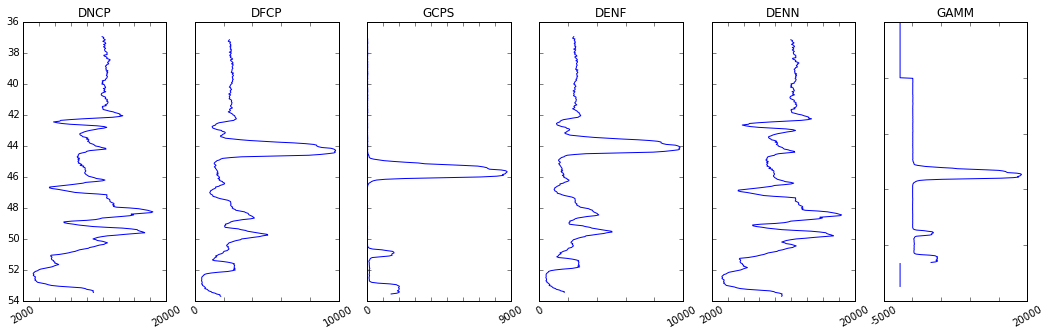

In [22]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

l2 = las_reader.read("GT1457B.LAS")
fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, len(l2.curves)-1, wspace=0.2)
for i, curve in enumerate(l2.curves[1:]):
    if i > 0:
        shareax = ax
    else:
        shareax = False
    ax = fig.add_subplot(gs[i], sharey=None)
    ax.plot(curve.data, l2.index)
    ax.set_title(curve.mnemonic)
    if i > 0:
        ax.set_yticklabels([])
    ax.set_ylim(*ax.get_ylim()[::-1])
    ax.set_xticklabels(["%.0f" % xi if xi in ax.get_xlim() else "" for xi in ax.get_xticks()], rotation=30)

In [23]:
print(l2._text)

~Version Information
VERS.    1.20:   CWLS log ASCII Standard - version 1.20
WRAP.      NO:   one line per depth step
~Well Information
#MNEM.UNIT     Data Type     Information
#_________     _________     ________________________
 STRT.M           30.000:
 STOP.M           53.700:
 STEP.M            0.050:
 NULL.              -0.0:
 COMP.           COMPANY: 
 WELL.              WELL: GT14571
 FLD.              FIELD: 
 LOC.           LOCATION:  
 CNTY.            COUNTY:  
 STAT.             STATE: 
 CTRY.           COUNTRY: 
 SRVC.   SERVICE COMPANY: 
 DATE.          LOG DATE: 07/05/2014
 UWI.     UNIQUE WELL ID: unknown
~Curve Information
#MNEM.UNIT       Curve  Information
#_________       _____  ___________________
 DEPT.M        :    1   DEPTH
 DNCP.cps      :    2   DNCPS
 DFCP.cps      :    3   DFCPS
 GCPS.cps      :    4   GCPS
 DENF.cps      :    5   DENS_F
 DENN.cps      :    6   DENS_N
 GAMM.cps      :    7   GAMMA
~Parameter Information
~Other Information
~A Depth      DNC